In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import xmltodict
from pprint import pprint
import os
import csv
from api_keys import z_keys
from scipy.stats import sem
from scipy import stats as st
# from stats import median
import numpy as np

In [2]:
boxny_df = pd.read_excel("/Users/JBagga/workspace/project_test/2018NYSales.xls")

In [3]:
boxny_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,2018-05-22
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,0,2018-05-23
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,1,0,1,1883,5200,1900,1,A4,6100000,2018-12-03
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,,B1,113 AVENUE C,,...,2,0,2,1218,4764,1899,1,B1,0,2018-04-25
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,2,0,2,1510,4520,1900,1,B9,0,2018-11-29
5,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,2,0,2,1510,4520,1900,1,B9,0,2018-11-29
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,20,2,22,3481,14588,1930,2,C7,8300000,2018-12-10
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,12,4,16,4186,10588,1900,2,C7,10350000,2018-09-07
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,18,0,18,2271,10650,1910,2,C1,5000000,2018-09-05
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,4,0,4,1950,5446,2001,2,C3,6250000,2018-05-09


In [4]:
boxny1_df =boxny_df[boxny_df['ZIP CODE']>10000]

In [5]:
z_list= [[10026,10027,10030,10037,10039],[10001,10011,10018,10019,10020,10105, 10036],\
        [10029,10035], [10010,10016,10017,10022],\
        [10012,10013,10014],\
        [10004,10005,10006,10007,10038,10280,10282],\
        [10002,10003,10009],\
        [10021,10028,10044,10065,10075,10128],\
        [10023,10024,10025,10069],[10031,10032,10033,10034,10040]]
s_neighbor =['Central Harlem','Chelsea/Clinton','East Harlem','Gramercy/Murray',\
               'Greenwich/Soho','Lower Manhattan','Lower Eastside','Upper Eastside',\
               'Upper Westside','Inwood/Washington Heights']

In [6]:
mydict4={}
for zcode,neighb in zip(z_list,s_neighbor):
    for val3 in zcode:
        mydict4[val3]=neighb
mydict4
boxny1_df['Compact Neighborhood'] = boxny1_df['ZIP CODE'].map(mydict4)
boxny1_df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Compact Neighborhood
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,0,1,987,2183,1860,1,A4,4844809,2018-05-22,Lower Eastside
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,0,1,987,2183,1860,1,A4,0,2018-05-23,Lower Eastside
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,0,1,1883,5200,1900,1,A4,6100000,2018-12-03,Lower Eastside
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,,B1,113 AVENUE C,,...,0,2,1218,4764,1899,1,B1,0,2018-04-25,Lower Eastside
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,0,2,1510,4520,1900,1,B9,0,2018-11-29,Lower Eastside
5,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,0,2,1510,4520,1900,1,B9,0,2018-11-29,Lower Eastside
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,2,22,3481,14588,1930,2,C7,8300000,2018-12-10,Lower Eastside
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,4,16,4186,10588,1900,2,C7,10350000,2018-09-07,Lower Eastside
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,0,18,2271,10650,1910,2,C1,5000000,2018-09-05,Lower Eastside
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,0,4,1950,5446,2001,2,C3,6250000,2018-05-09,Lower Eastside


In [7]:
boxny2_df = boxny1_df.loc[:,['SALE PRICE','Compact Neighborhood']]
boxny2_df.dropna() # removed NaN
boxny2_df = boxny2_df[boxny2_df['SALE PRICE'] > 500000]
boxny2_df = boxny2_df[boxny2_df['SALE PRICE'] < 3500000]
# ny1_df = ny_df[ny_df['SALE PRICE'] > 100000]
# boxny3_df=boxny2_df.groupby('Compact Neighborhood')
# boxny3_df


In [8]:
# DataFrame.boxplot(column=None, by=None, \
#                   ax=None, fontsize=None, rot=0, grid=True, figsize=None, \
#                   layout=None, return_type=None, **kwds)[source]

def median(arr):
    """
    Calculates the median of a list of numbers.

    Usage: median([3, 4, 5, 6, 7]) # 5
    """
    arr.sort()
    if len(arr) % 2 == 1:
        return arr[len(arr) // 2]
    else:
        mid1 = len(arr) // 2
        mid2 = mid1 - 1
        return (arr[mid1] + arr[mid2]) / 2



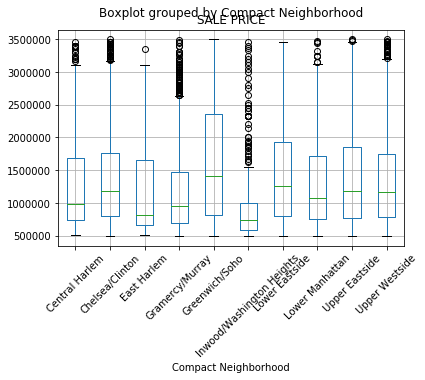

In [9]:
boxny2_df.boxplot('SALE PRICE','Compact Neighborhood',rot=45)

In [10]:
DataFrame.boxplot(column=None, by=None, ax=None, \
                  fontsize=None, rot=0, grid=True, figsize=None, layout=None, \
                  return_type=None, **kwds)[source]

NameError: name 'DataFrame' is not defined

In [ ]:
ny3_df = ny2_df.groupby('Compact Neighborhood')['SALE PRICE'].\
                       agg({'Sale Count':'count','Sale Sum':'sum','Sale Avg':'mean','Sale Std Error':'sem'}).\
                        reset_index()
# ny3_df = ny3_df.drop(0)
ny3_df.head()

In [ ]:
ny3_df['Compact Neighborhood'].unique()

In [ ]:
# ny5_df=ny4_df[:-1] #Removing Zip 10463 as it's part of BRONX and not Manhattan
# ny5_df
# # ny5_df['Avg Sale Price']=ny5_df['Sale Sum']/ny5_df['Sale Count']
# # ny5_df

In [ ]:
fig, ax = plt.subplots()

x4 = np.arange(len(ny3_df))
y4 = ny3_df['Sale Avg']
y5=ny3_df['Sale Count']
tick_locations = [value for value in x4]
ax.errorbar(x4, y4, yerr=ny3_df['Sale Std Error'], fmt="o", color="b",
            alpha=0.5, label='Sale Avg', linestyle='dotted')

ax.errorbar(x4, y5, yerr=ny3_df['Sale Std Error'], fmt="^", color="r",
            alpha=0.5, label='Sale Count', linestyle='dotted')

plt.xticks(tick_locations,ny3_df['Compact Neighborhood'],rotation='vertical')

ax.set_xlabel("Neighborhood")

ax.set_ylabel("Sales")

ax.set_title('Avg Sale Price per Neighborhood')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
# plt.figure(figsize=(35,20))
plt.savefig('AvgSalePriceNeighborlinewithSEM.png')

plt.show()

In [ ]:
fig, ax = plt.subplots()

x4 = np.arange(len(ny3_df))
y4 = ny3_df['Sale Avg']
y5=ny3_df['Sale Count']
tick_locations = [value for value in x4]
ax.errorbar(x4, y4, yerr=ny3_df['Sale Std Error'], fmt="o", 
            alpha=0.5, label='Avg', color="b",linestyle='dotted')

# ax.errorbar(x4, y5, yerr=ny3_df['Sale Std Error'], fmt="^", color="r",
#             alpha=0.5, label='Sale Count', linestyle='dotted')

ny3_df['Sale Count'].plot(secondary_y=True, label="Sales Volume", legend=True,figsize=(20,10),color='r')

plt.xticks(tick_locations,ny3_df['Compact Neighborhood'],rotation='vertical')

# ax.set_xlabel("Neighborhood")

ax.set_ylabel("Average Sale Price")

ax.set_title('Average Sales versus Sales Volume by Manhattan Neighborhood')

# plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
# plt.figure(figsize=(35,20))
#plt.savefig('NeighborhoodSaleswithSEM.png')
plt.savefig('Average Sales versus Sales Volume by Manhattan Neighborhood.png')
plt.show()

In [ ]:
x6 = np.arange(0, len(ny3_df['Compact Neighborhood']))
y6 = ny3_df['Sale Avg']
y7=ny3_df['Sale Count']



ny3_df['Sale Avg'].plot(kind='bar',label="Avg Sale Price", yerr=ny3_df['Sale Std Error'],legend=True,figsize=(20,10))
ny3_df['Sale Count'].plot(secondary_y=True, label="Sales Volume", legend=True,figsize=(20,10),color='r')
# tick_locations = x6
# plt.xlabel("Neighborhood")
# plt.legend(loc="best", fontsize="large", fancybox=True)
tick_locations = x6
plt.xticks(tick_locations,ny3_df['Compact Neighborhood'],rotation=45)
plt.title('Avg Sale Price vs Sale Volume per Neighborhood with Standard Error')
plt.savefig('Avg Sale Price vs Sale Volume per Neighborhood with Standard Error.png')